# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
#np.set_printoptions(suppress=True, precision=1, linewidth=140)
print('States look like:\n', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
if False:
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [2]:
import json
import os

def compute_if_needed(parameter_training, parameter_agent, scores):
    found = False
    for score in scores:
        parameter_agent_existing = score['agent']
        if (parameter_agent_existing == parameter_agent):
            found = True
            print("Load data from file: {}".format(str(parameter_agent)))
    if found == False:
        print("Training data with : {}".format(str(parameter_agent)))
        score = { 'training': parameter_training.copy(),
          'agent':  parameter_agent.copy(),
          'score' : dqn(parameter_training, parameter_agent)}
        scores.append(score)


def load_score(file_name):
    if os.path.isfile(file_name) == False:
        return []
    with open(file_name, 'r+') as dataFile:
        scores = json.loads(dataFile.readline())
    return scores
    
def save_score(scores, file_name):
    dump = json.dumps(scores)
    f = open(file_name,"w")
    f.write(dump)
    f.close()


In [ ]:
import torch
from collections import deque
from dqn_agent import Agent

def dqn(parameter_training, parameter_agent):
    """Deep Q-Learning.

    Params
    ======
        parameter_training (dict)
        parameter_agent (dict)
    """
    agent = Agent(parameter_agent)   
    
    scores_window = deque(maxlen=10)              # last 100 scores
    eps = parameter_training['eps_start']         # initialize epsilon
    eps_end = parameter_training['eps_end']       # minimum value of epsilon 
    eps_decay = parameter_training['eps_decay']   # multiplicative factor (per episode) for decreasing epsilon
    n_episodes = parameter_training['n_episodes'] # maximum number of training episodes
    scores = []                                   # list containing scores from each episode
    checkpoint_filename = 'checkpoints/' + '__'.join(['%s_%s' % (key, value) for (key, value) in parameter_agent.items()]).replace(" ", "").replace(",", "-") + ".pth";
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        done = False
        while (done == False):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]  
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\r\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            if np.mean(scores_window)<13.0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                agent.save_checkpoint(checkpoint_filename)
            else:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                agent.save_checkpoint(checkpoint_filename)
    return scores


In [ ]:

parameter_training = {'n_episodes': 2000,
                      'eps_start': 1.0,
                      'eps_end': 0.1,
                      'eps_decay': 0.995}
parameter_agent =    {'state_size': 37, 
                      'action_size': 4, 
                      'hidden_layers': [64,64],
                      'drop_p': 0.0,
                      'seed': 0,
                      'GAMMA': 0.99,
                      'LR': 0.0005,
                      'UPDATE_EVERY': 25,
                      'BUFFER_SIZE': 100000,
                      'BATCH_SIZE': 64,
                      'TAU': 0.001}
file_name = 'scores_jupyter.json'
scores = load_score(file_name)

for hidden_layers in [[64,64],[128,128],[256,256]]:
    parameter_agent['BUFFER_SIZE'] = 100
    parameter_agent['UPDATE_EVERY'] = 100
    parameter_agent['hidden_layers'] = hidden_layers
    compute_if_needed(parameter_training, parameter_agent, scores)
    save_score(scores, file_name)
    for BUFFER_SIZE in [10000, 100000]:
        for UPDATE_EVERY in [10, 25, 50, 100]:
            for drop_p in [0.0, 0.25, 0.50]:
                parameter_agent['drop_p'] = drop_p
                parameter_agent['BUFFER_SIZE'] = BUFFER_SIZE
                parameter_agent['UPDATE_EVERY'] = UPDATE_EVERY
                compute_if_needed(parameter_training, parameter_agent, scores)
                save_score(scores, file_name)

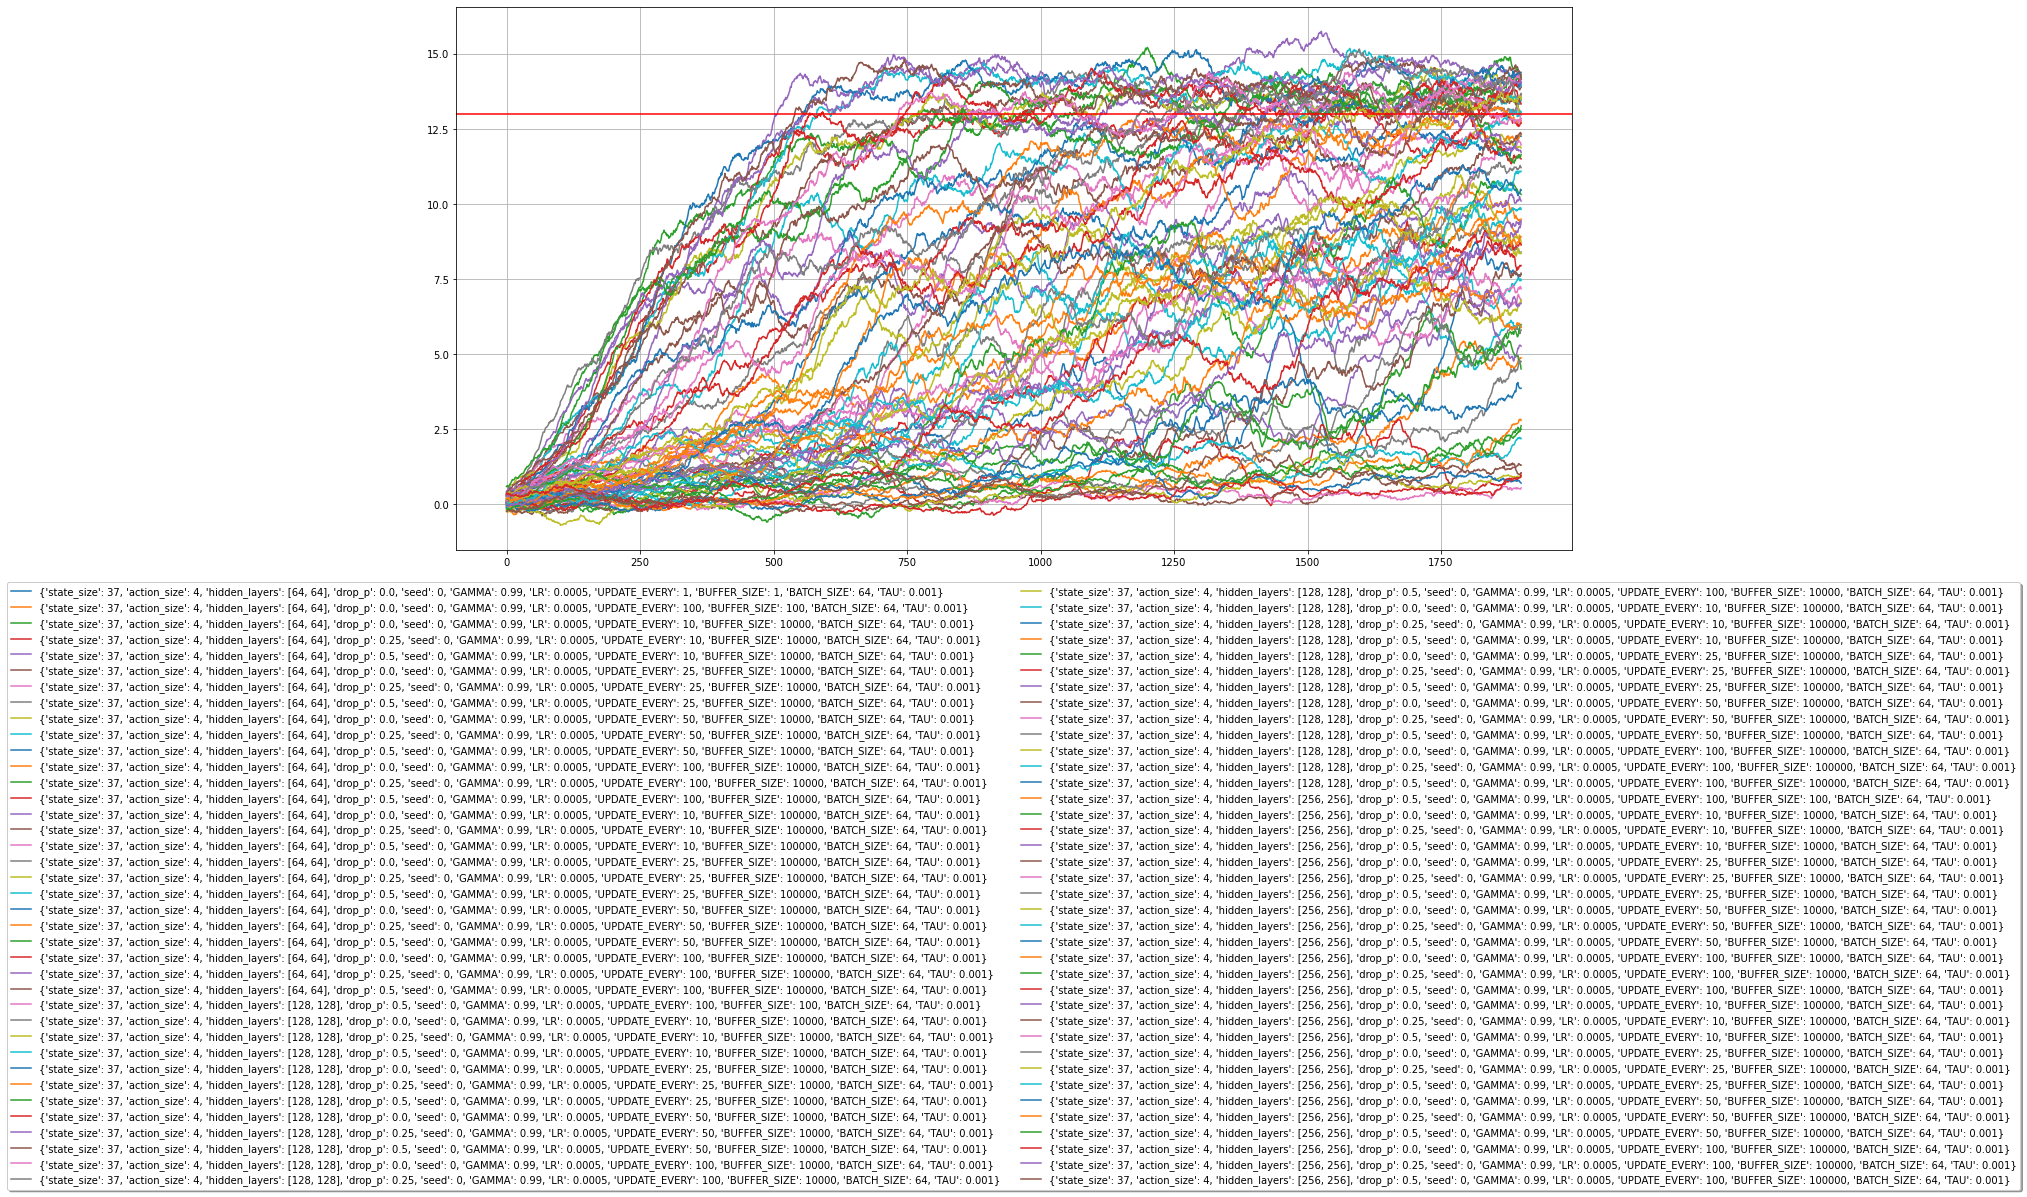

In [3]:
import matplotlib.pyplot as plt
import numpy as np

scores = load_score('scores_jupyter.json')
    
#with open('scores_jupyter.json', 'r+') as dataFile:
#    scores = json.loads(dataFile.readline())
        
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.rcParams['figure.figsize'] = [20, 10]
for score in scores:
    key = str(score['agent'])
    values = score['score']
    y = running_mean(values, 100)
    x = list(range(0, len(y)))
    plt.plot(y, label=key)

plt.grid()
plt.axhline(y=13, color='r', linestyle='-')
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np

scores = load_score('scores_jupyter.json')

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)


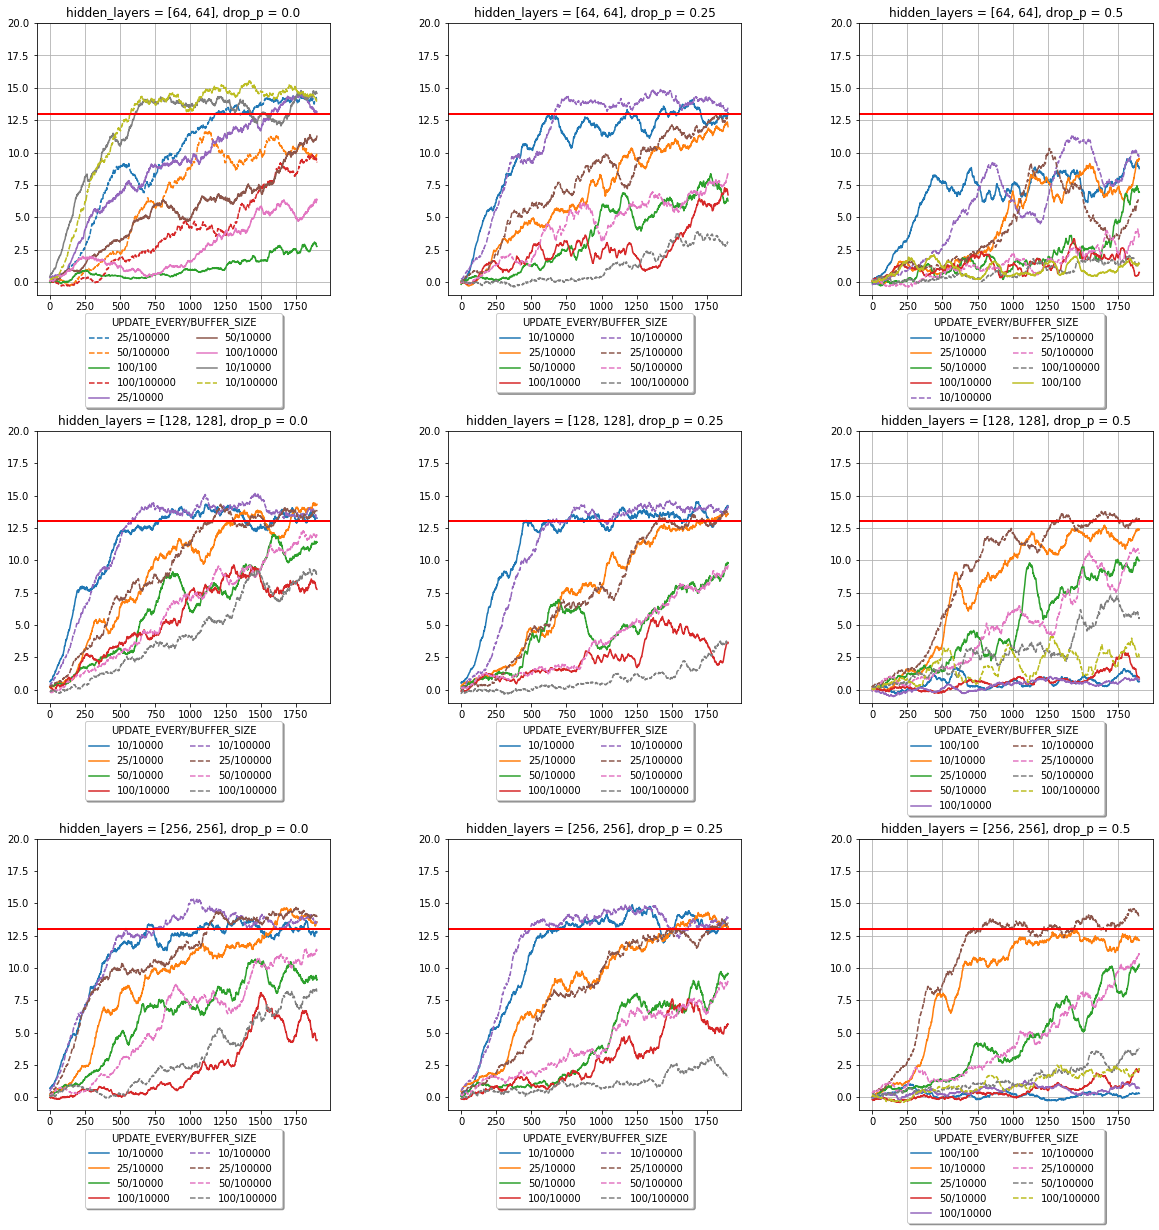

In [5]:
import matplotlib.pyplot as plt
import numpy as np

scores = load_score('scores_jupyter.bak.json')
    
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.4)

pltWnds = []
for i in range(1, 10):
    pltWnds.append(fig.add_subplot(3, 3, i))

for score in scores:
    BUFFER_SIZE = score['agent']['BUFFER_SIZE']
    if (BUFFER_SIZE == 10000) or (BUFFER_SIZE == 100000) or (BUFFER_SIZE == 100):
        hidden_layers = score['agent']['hidden_layers']
        i = [[64,64],[128,128],[256,256]].index(hidden_layers)
        drop_p = score['agent']['drop_p']
        j = [0.0, 0.25, 0.50].index(drop_p)
        ax = pltWnds[i*3+j]
        ax.set_ylim([-1, 20])
        key = str(score['agent']['UPDATE_EVERY'])
        values = score['score']
        y = running_mean(values, 100)
        x = list(range(0, len(y)))
        ax.grid()
        if(score['agent']['BUFFER_SIZE'] == 100000):
            linestyle = '--'
        else: 
            linestyle = '-'
        ax.plot(y, label="{}/{}".format(key,BUFFER_SIZE), linestyle=linestyle)
        ax.axhline(y=13, color='r', linestyle='-')
        ax.legend()
        ax.title.set_text('hidden_layers = ' + str(hidden_layers)+ ', drop_p = ' + str(drop_p))
        ax.legend(title='UPDATE_EVERY/BUFFER_SIZE', loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()
fig.savefig('temp.png', dpi=fig.dpi)
